In [1]:
#information
# GPA data for each student
# year of university for each student
# Gender
# Quarantine GPA
# Online Lecture Attendence

# What do we want to know from the data / motivating questions
# Question 1: Is there a correlation between gender and year of education?
# Question 2: Is there a correlation between Quarantine GPA and Online Lecture Attendence
# Question 3: How are grades distributed in UCR?
# Question 4: Do grades become more consistent the longer you are at university?

# graphics hopefully done by thursday
# graphic 1: scatterplot of gender vs year of education
# graphic 2: scatterplot of Quarantine GPA and Online Lecture Attendence
# graphic 3: plot  of GPA distribution vs normal distribution - David
# graphic 4: heat map of GPA and year - Matthew
# graphic 5: tabulated std deviation of GPA by year

# predictions
# prediction 1: no expected correlation between gender and year of education [test null hypothesis]
# prediction 2: expected correlation between Quarantine GPA and Online lecture attendence [test null hypothesis]
# prediction 3: we expect GPAs to be distributed normally. [normal measure of central tendency]
# prediction 4: we expect the spread of GPA to decrease as you spend more time in university [std deviation GPA correlated to year]

# Tests to run
# Chi squared correlation testing to test null hypothesis
# test the fit of GPA distributions to the normal distribution to test central tendency
# measure standard deviation of GPA per year to determine the change in GPA spread over time

#make toy datasets with known outcomes to test veracity of each test. with  toy data (2 to 3 entries) and compute by hand

In [2]:
import pandas as pd
df = pd.read_csv("CS105_Survey.csv") # import the data from the survey
df = df.drop(0) # NOTE: this top column had lots of junk data, we believe it is leftover from an old survey and is thus dropped
df.drop (df.columns[[64,65,66,67,68,69,70,71,72,73,74,75,76]],axis = 1,inplace = True) #remove empty columns associated with junk entry
display(df) # verify successful import

,Timestamp,What is your gender?,What is your ethnicity?,What academic year are you?,What is your major?,"Student GPA? (If you don't know guestimate, ex. 3.5+)",After COVID did your GPA increase or decrease?,Number of units enrolled?,Have you attended UCR prior to Spring Quarter 2020?,How do you feel about your progress in academics so far?,...,Do you have a job during the pandemic?,Which streaming services were you subscribed to before the pandemic?,Approximately how much have you spent on streaming services per month before the pandemic?,Did you personally pay for the whole subscription?,"If you did pay for the whole subscription, for which streaming services did you pay for (before the pandemic)? If you did not pay for any services at all, please answer with ""None"".",Which streaming services are you subscribed to now?,Approximately how much have you spent on streaming services per month during the pandemic?,D0 you personally pay for the whole subscription?,"If you did pay for the whole subscription, for which streaming services did you pay for (after the pandemic)? If you did not pay for any services at all, please answer with ""None"".","Have you started watching more Netflix, Hulu, Disney+, etc.?"
1,2021/01/30 12:38:43 PM PST,Male,Asian,Sophomore,Computer Science with Business Applications,3.3 - 3.69,Increase,13.0,Yes,3.0,...,Yes,Netflix,$10 or less,"No, I use a family member's account",Netflix,Netflix,$10 or less,"No, I use a family member's account",Netflix,1
2,2021/01/30 12:41:24 PM PST,Male,Asian,Sophomore,CSBA,3.7 - 4.0,Same,4.0,Yes,5.0,...,No,None,I did not own any subscriptions,Don't have a subscription,None,None,I do not own any subscriptions.,Don't have a subscription,None,3
3,2021/01/30 12:46:31 PM PST,Male,Asian,Sophomore,Computer Science,3.7 - 4.0,Decrease,16.0,Yes,3.0,...,No,Netflix;Hulu;Disney+,$21 to $30,"No, I use a family member's account","Hulu, Showtime",Netflix;Hulu;Disney+,$21 to $30,"No, I use a family member's account","Hulu, Showtime",4
4,2021/01/30 12:51:37 PM PST,Female,Asian,Sophomore,Computer Science,3.3 - 3.69,Increase,12.0,Yes,5.0,...,No,Netflix;Hulu,$21 to $30,"No, I use a family member's account",None,None,I do not own any subscriptions.,"No, I use a family member's account",None,5
5,2021/01/30 1:11:26 PM PST,Male,Asian,Sophomore,Computer Science,3.7 - 4.0,Same,18.0,Yes,4.0,...,No,Netflix,$10 or less,"No, I use a family member's account",None,Netflix,$10 or less,"No, I use a family member's account",None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2021/02/03 11:51:40 PM PST,Female,Asian,Senior/Senior+,CMDB,3.3 - 3.69,Increase,17.0,No,4.0,...,No,Netflix,$10 or less,"Yes, I paid for the whole subscription",Netflix,"Netflix;Hulu;Amazon prime, CBS",$11 to $20,"Yes, I pay for the whole subscription",All mentioned above,Yep
63,2021/02/04 10:35:52 AM PST,Male,Hispanic or Latino or Spanish Origin,Senior/Senior+,CS,3.0 - 3.29,Increase,12.0,Yes,3.0,...,No,Netflix;Hulu;HBO Max;Disney+;Twitch,$31+,"Little of everything. Sometimes it’s split, so...","Hulu, Twitch",Netflix;Hulu;HBO Max;Disney+;Twitch,$31+,"Little of everything. Sometimes it’s split, so...",All,"Nope, about the same"
64,2021/02/04 1:31:23 PM PST,Male,Asian,Sophomore,Computer Science with Business Applications,3.3 - 3.69,Same,13.0,Yes,2.0,...,No,Netflix;Hulu;Disney+,$10 or less,"No, I use a family member's account",spotify,Netflix;Hulu;Disney+;spotify,$10 or less,"No, I use a family member's account",None,Yes
65,2021/02/04 1:46:27 PM PST,Female,Asian;Native Hawaiian or Pacific Islander,Freshman,Material Science and Engineering,2.7 - 2.99,Same,18.0,No,4.0,...,No,Netflix;Hulu;HBO Max;Disney+,$31+,"No, I use a family member's account",None,Netflix;Hulu;HBO Max;Disney+,$31+,"No, I use a family member's account",None,No


**What information do we have?**

We have information like the GPA, the academic year, gender, quarantine GPA, and online lecture attendance of each student.

**What do we want to know from the data?**

Is there a correlation between gender and year of education?

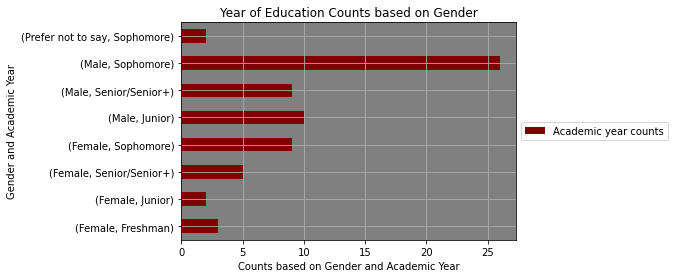

In [3]:
gender_and_yearOfEducation_df = df[["What is your gender?", "What academic year are you?"]]
gender_and_yearOfEducation_groupby = gender_and_yearOfEducation_df.groupby(["What is your gender?", "What academic year are you?"])["What academic year are you?"].count()
gender_and_yearOfEducation_groupby

gender_and_yearOfEducation_groupby_df = pd.DataFrame(gender_and_yearOfEducation_groupby)
gender_and_yearOfEducation_groupby_df.columns = ["Academic year counts"]
gender_and_yearOfEducation_groupby_df

gender_and_yearOfEducation_barGraph = gender_and_yearOfEducation_groupby_df.plot.barh(rot = 0, grid = True, color = "maroon")
gender_and_yearOfEducation_barGraph.set_facecolor("gray")
gender_and_yearOfEducation_barGraph.set_title("Year of Education Counts based on Gender")
gender_and_yearOfEducation_barGraph.set_xlabel("Counts based on Gender and Academic Year")
gender_and_yearOfEducation_barGraph.set_ylabel("Gender and Academic Year")
gender_and_yearOfEducation_barGraph.legend(loc = "center left", bbox_to_anchor = (1.0, 0.5))

**Is there a correlation between time spent on HW and time spent in student orgs?**

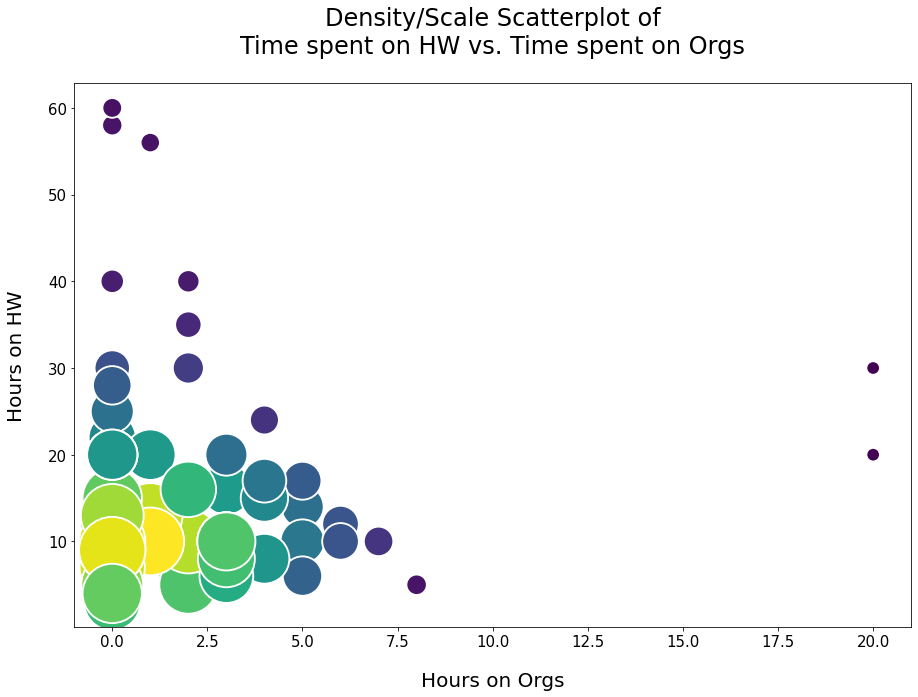

In [6]:
# imports
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# Preparation for Hours on Orgs vs. Hours on HW
survey_df = pd.read_csv("Revised_Survey.csv")
all_questions = survey_df.columns[:-13]
hours_on_orgs_identifier = all_questions[13]
hours_on_hw_identifier = all_questions[15]
graphic6_df = survey_df[[hours_on_orgs_identifier, hours_on_hw_identifier]]
# Calculate the point density
x_col = graphic6_df[hours_on_orgs_identifier].fillna(0)
y_col = graphic6_df[hours_on_hw_identifier].fillna(0)
graphic6_df.fillna(0)
xy = np.vstack([x_col,y_col])
z = gaussian_kde(xy)(xy)
z = z[1:]
# graph preparation
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(data=graphic6_df, x=hours_on_orgs_identifier, y=hours_on_hw_identifier, c=z, s=750000 * z)
# graph config
ax.set()
ax.set_title("Density/Scale Scatterplot of\nTime spent on HW vs. Time spent on Orgs", size=24, pad=30)
ax.set_xlabel("Hours on Orgs", size=20, labelpad=22)
ax.set_ylabel("Hours on HW", size=20, labelpad=22)
ax.tick_params(axis='x', labelsize=15, rotation=0)
ax.tick_params(axis='y', labelsize=15, rotation=0)

**How are grades distributed in UCR?**

"We can see the counts of GPA's for students overall and by year"

<AxesSubplot:>

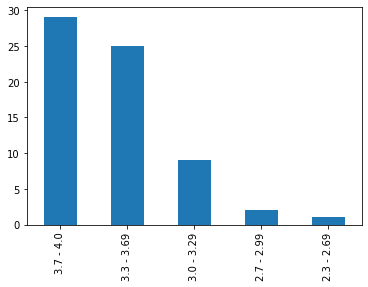

In [9]:
g = df["Student GPA? (If you don't know guestimate, ex. 3.5+)"].value_counts().plot.bar()

display("We can see the counts of GPA's for students overall and by year",g)

'This leads to the following density'

<AxesSubplot:>

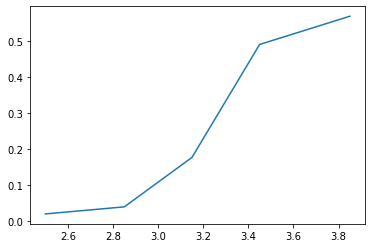

In [10]:
df3 = df.replace({"2.3 - 2.69":2.5,"2.7 - 2.99":2.85,"3.0 - 3.29":3.15,"3.3 - 3.69":3.45,"3.7 - 4.0":3.85})
gd = df3["Student GPA? (If you don't know guestimate, ex. 3.5+)"].value_counts()/df3.value_counts().sum()

display("This leads to the following density",gd.plot())

A normal distribution about a GPA of 2.0 or a C average such that each letter up is a standard deviation above and that each letter down is a standard deviation below we find the following density


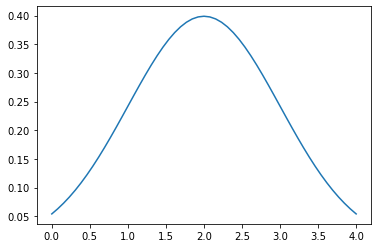

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
s = "A normal distribution about a GPA of 2.0 or a C average such that each letter up is a standard deviation above and that each letter down is a standard deviation below we find the following density"
mu = 2
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 53)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
print(s)
plt.show()

Here we see a large discrepancy betweent the normal distribution and the distribution of GPAs among the students. We must remember though that our sample does not account for any students that failed any prerequisite class.


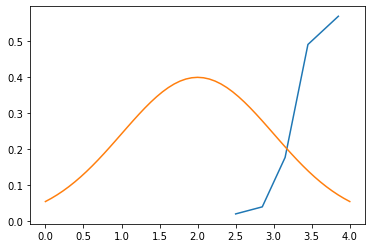

In [12]:
gd.plot()
plt.plot(x, stats.norm.pdf(x, mu, sigma))
print("Here we see a large discrepancy betweent the normal distribution and the distribution of GPAs among the students. We must remember though that our sample does not account for any students that failed any prerequisite class.")
plt.show()

Assuming that each class you take removes the bottom half of the distribution how many classes do you have to take to reach the given distribution?


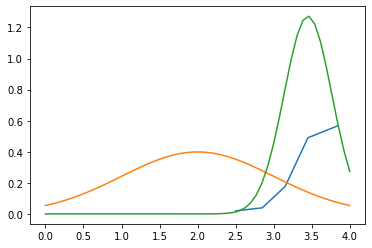

we can see here the median of the normal is has a 3rd quartile of 2.68 at this rate to get from the median of two to that of the data set we must take about 2.1323529411764706 classes before which makes sense given that the prerequisistes for CS 105 is CS 10, CS 12 and CS 14


In [13]:
print("Assuming that each class you take removes the bottom half of the distribution how many classes do you have to take to reach the given distribution?")

gd.plot()
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(x, stats.norm.pdf(x, df3["Student GPA? (If you don't know guestimate, ex. 3.5+)"].median(), df3["Student GPA? (If you don't know guestimate, ex. 3.5+)"].std()))

plt.show()
print("we can see here the median of the normal is has a 3rd quartile of",mu + 0.68*sigma, "at this rate to get from the median of two to that of the data set we must take about", (df3["Student GPA? (If you don't know guestimate, ex. 3.5+)"].median()-2)/.68, "classes before which makes sense given that the prerequisistes for CS 105 is CS 10, CS 12 and CS 14")

**How are GPAs distributed by year in UCR?**

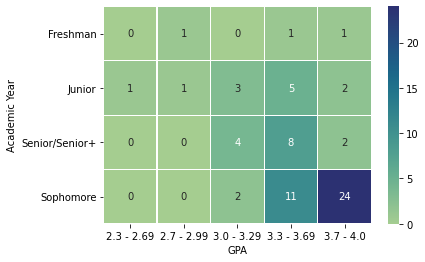

In [15]:
year_gpa_counts = df.pivot_table(index = "What academic year are you?",columns = "Student GPA? (If you don't know guestimate, ex. 3.5+)",values = "Timestamp", aggfunc = "count")
year_gpa_counts.update(year_gpa_counts.fillna(0))

ax = sns.heatmap(year_gpa_counts,cmap = 'crest', annot=True, linewidths=.1)
plt.xlabel("GPA") 
plt.ylabel("Academic Year") 
plt.show()

**Do grades become more consistent the longer you are at university?**

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statistics
df = pd.read_csv("CS105_Survey.csv") # import the data from the survey
df = df.drop(0) # NOTE: this top column had lots of junk data, we believe it is leftover from an old survey and is thus dropped
df.drop (df.columns[[64,65,66,67,68,69,70,71,72,73,74,75,76]],axis = 1,inplace = True) #remove empty columns associated with junk entry
df["GPA Deviation"] = df["Student GPA? (If you don't know guestimate, ex. 3.5+)"]
midpoints = {
    "2.3 - 2.69" : 2.5,
    "2.7 - 2.99" : 2.85,
    "3.0 - 3.29" : 3.15,
    "3.3 - 3.69" : 3.5,
    "3.7 - 4.0"  : 3.85
}
for element in midpoints:
    df["GPA Deviation"] = df["GPA Deviation"].replace(element, midpoints[element])
df["Academic Year"] = df["What academic year are you?"]
df.groupby(["Academic Year"]).std().filter(["GPA Deviation"])

,GPA Deviation
Academic Year,
Freshman,0.507445
Junior,0.393315
Senior/Senior+,0.232048
Sophomore,0.209667
